# DT2470 Lab 02: Teh Machine Learnings

by Bob L. T. Sturm

In this lab you will practice some fundamental concepts of machine learning. In the first part you will work with an artificial dataset. The second part involves a music dataset. There's a lot more to explore, so this lab only scratches the surface!

The lab report you submit should be a testament to your intelligence, as well as a reflection of your willingness to be a part of this module. You are free to use whatever software you want, e.g., python, MATLAB, Processing, C++, etc. But I give tips below in python.

- [Numpy API](https://docs.scipy.org/doc/numpy-1.13.0/index.html)
- [Pandas API](https://pandas.pydata.org/docs/reference/index.html#api)
- [Scikit-learn API](https://scikit-learn.org/stable/)
- [MatPlotlib API](https://matplotlib.org/3.1.1/api/index.html)
- [Numpy Cheat Sheet](https://www.dataquest.io/blog/numpy-cheat-sheet/)
- [Pydub API](https://github.com/jiaaro/pydub/blob/master/API.markdown)

I also include some images so you can confirm whether you are on the right track, or just to have a brief pause to laugh at how far your answer is from being correct.


---



# Part 1: Basics

In this part, you will explore some basic principles of machine learning. First we are going to synthesize a "toy" dataset, where we know everything about the data. This is the "best case scenario", and can help us understand ML methods and their parameters, as well as debug implementations.

For more information:
- [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html) 

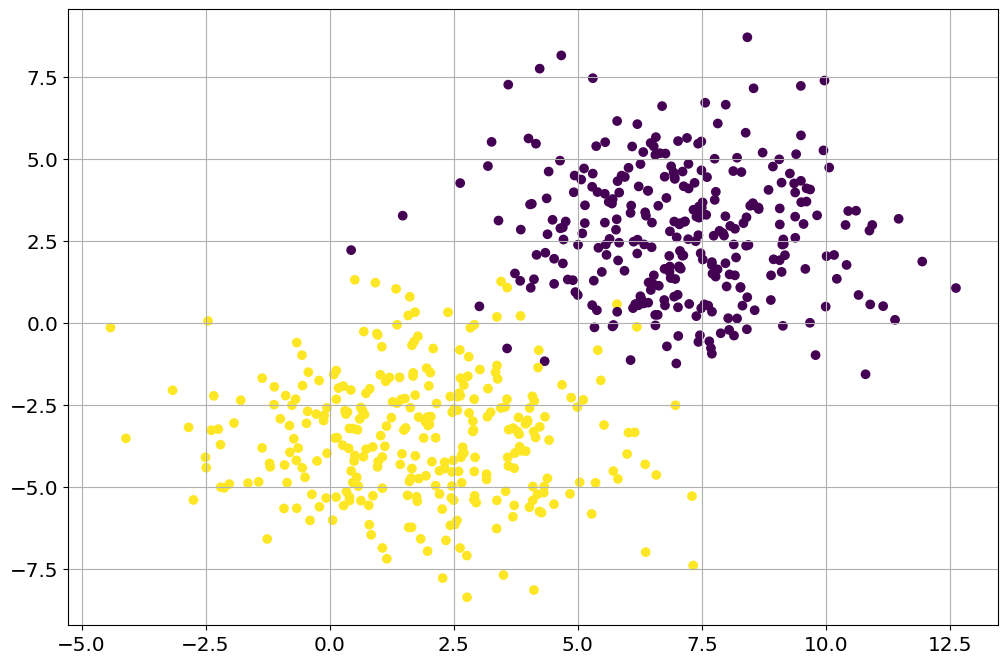

In [77]:
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt

numClasses = 2 # number of separate classes
numObservations = numClasses*300 # number of total observations
cluster_std = 2 # spread of the classes, larger leads to more confusion

# create a labeled dataset and make a pandas dataframe
X,y = datasets.make_blobs(numObservations,centers=numClasses,cluster_std=cluster_std)

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large','figure.figsize': (12, 8),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# make a scatter plot of the dataset
fig, ax = plt.subplots()
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(); plt.show()

# 1.1
Create a 80/20 train/test split of your data. See [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) for the function *train_test_split*.

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Number of train samples: ',len(X_train))
print('Number of test samples: ',len(X_test))

Number of train samples:  480
Number of test samples:  120


# 1.2

Create an instance of a nearest neighbor classifier and train it with your *training* data. See [sklearn.neighbors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors) for the appropriate function.

In [79]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

# 1.3 

Plot the decision boundary of your trained classifier. Use the *plot_decision_regions* function in [mlxtend.plotting](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/#plot_decision_regions).

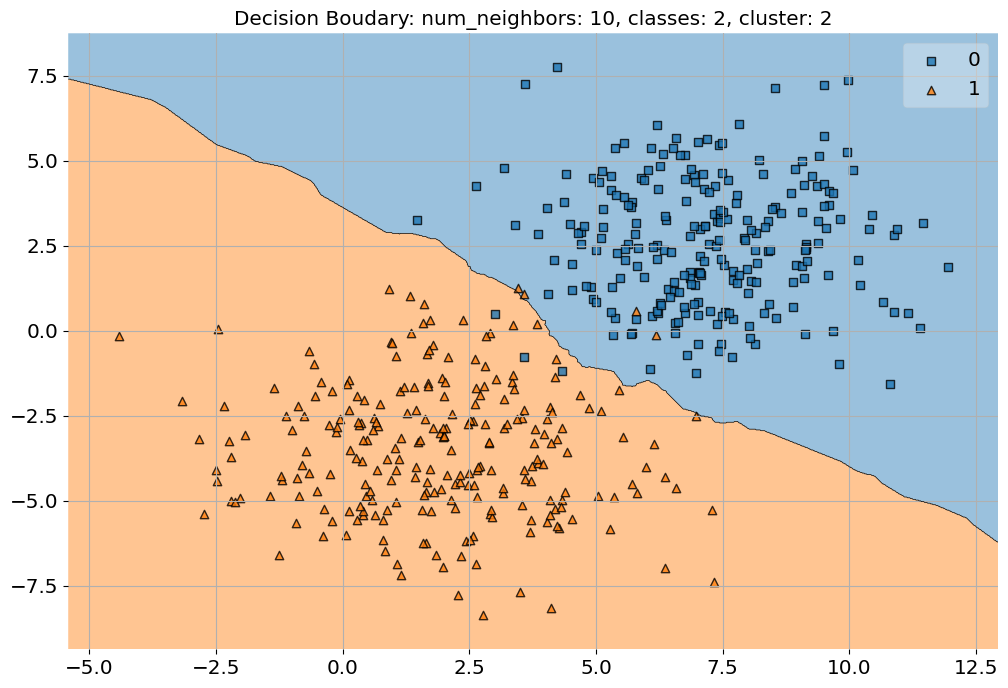

In [80]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train, clf=neigh)
plt.title('Decision Boudary: num_neighbors: {}, classes: {}, cluster: {}'.format(10, numClasses, cluster_std))
plt.grid()
plt.show()

# 1.4

Use your classifier to label the hold out set, and print out the predicted labels and true labels. 

In [81]:
y_pred = neigh.predict(X_test)

print(list(zip(y_test, y_pred)))

[(0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0)]


# 1.5 

Print the confusion matrix of the results. See [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) for a relevant function.

In [82]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)


[[63  1]
 [ 1 55]]


# 1.6

Use the *classification_report* function of [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to print out more metrics for your classifier.

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.98      0.98      0.98        56

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



# 1.7 

Now you will explore k nearest neighbor classification with the toy dataset.
Create a 50/30/20 train/validation/test split of your data.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2/(0.2+0.3), random_state=42)
print('Number of train samples: ',len(X_train))
print('Number of validation samples: ',len(X_val))                  
print('Number of test samples: ',len(X_test))

Number of train samples:  300
Number of validation samples:  180
Number of test samples:  120


# 1.8

For k in 1 to 51 by odd integers, train a kNN classifier and compute its accuracy on the training dataset and the validation dataset. Plot these accuracies as a function of k.

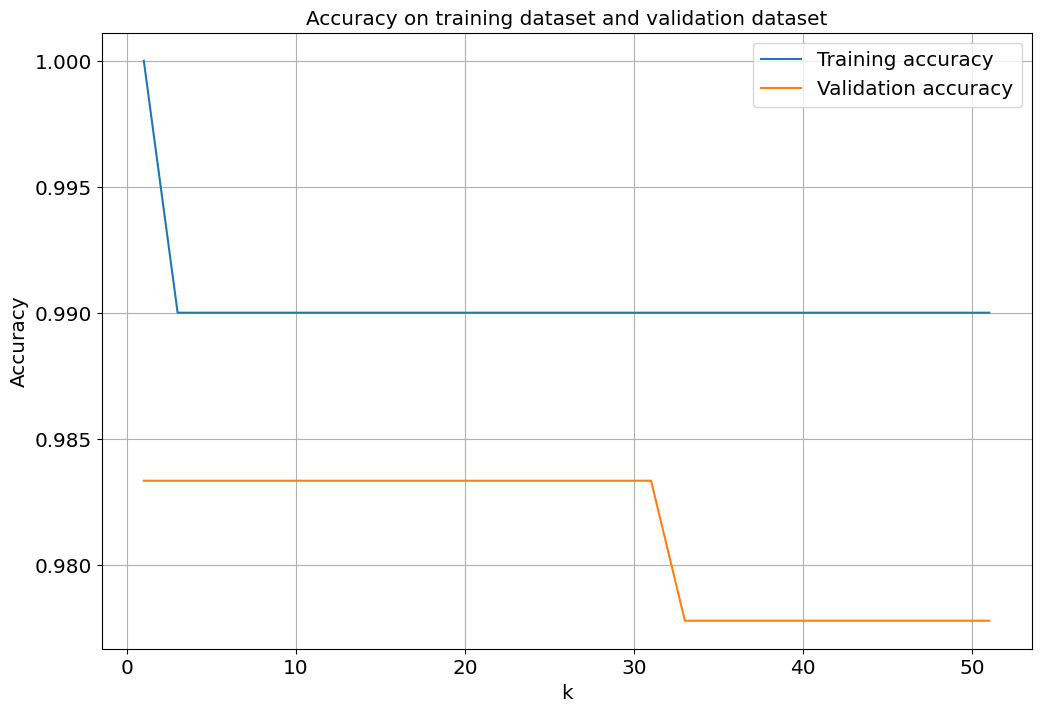

In [85]:
k = np.arange(1, 52, 2)
acc_train = []
acc_val = []
for i in k:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    acc_train.append(neigh.score(X_train, y_train))
    acc_val.append(neigh.score(X_val, y_val))

plt.figure()
plt.grid()
plt.title('Accuracy on training dataset and validation dataset')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot(k, acc_train)
plt.plot(k, acc_val)
plt.legend(('Training accuracy', 'Validation accuracy'))
plt.show()

## Generalization, Overfitting, and Underfitting

* If a model is able to make accurate predictions on unseen data: 
    * it is able to **generalize** from the training set to the test set.
* Building a model that is too complex for the amount of information in the data is called overfitting.
* This refers to the complexity of the decision boundary, **NOT** computational complexity.

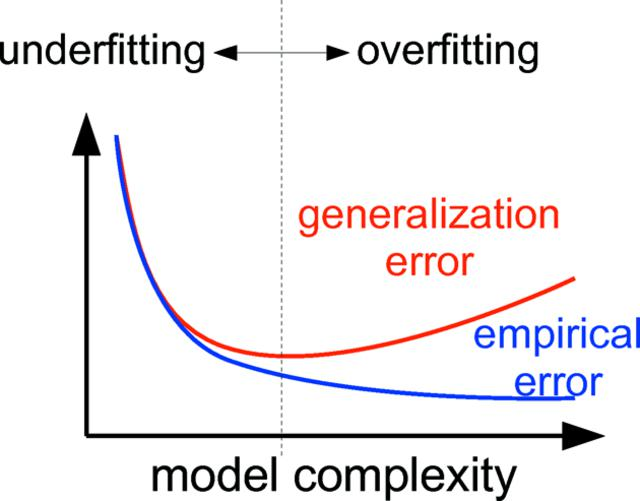

# 1.9

The complexity of KNN models decreases with K. Find the K with the highest validation accuracy, and train a kNN classifier with that K on the training data. Test it on the testing data and print its classification_report. If there are several possible K, choose one by some strategy.

In [86]:
k = np.argwhere(acc_val == np.max(acc_val)).ravel()[-1]
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        59
           1       0.97      0.98      0.98        61

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



# 1.10
For this classifier, plot its decision boundary, and compare with the boundary you see in #1.3.

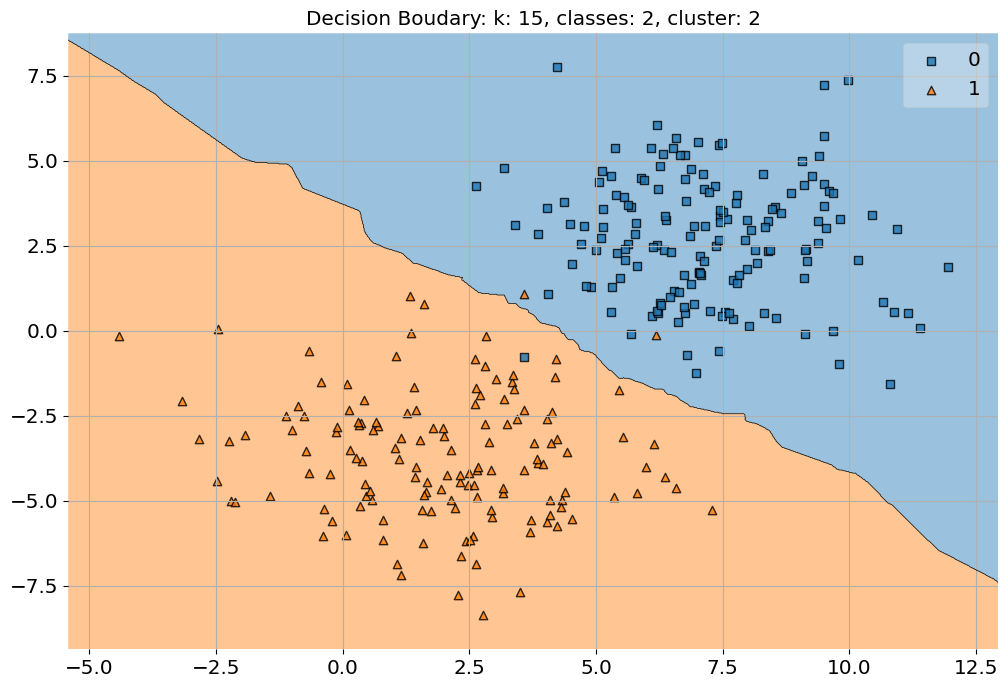

In [87]:
plot_decision_regions(X_train, y_train, clf=neigh)
plt.title('Decision Boudary: k: {}, classes: {}, cluster: {}'.format(k, numClasses, cluster_std))
plt.grid()
plt.show()

Compared to the figure in #1.3, the boundary between the two clusters is smoother. 

# 1.11

Change the toy dataset (number of classes, number of observations, cluster spread) and repeat the above. What happens as the cluster spread increase? What happens if there are more classes?

In [88]:
def toyDataset(numClasses, cluster_std):
    numObservations = numClasses*300
    X,y = datasets.make_blobs(numObservations,centers=numClasses,cluster_std=cluster_std)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2/(0.2+0.3), random_state=42)
    
    k = np.arange(1, 52, 2)
    acc_train = []
    acc_val = []
    for i in k:
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(X_train, y_train)
        acc_train.append(neigh.score(X_train, y_train))
        acc_val.append(neigh.score(X_val, y_val))
    
    k = np.argwhere(acc_val == np.max(acc_val)).ravel()[-1]
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    
    plot_decision_regions(X_train, y_train, clf=neigh)
    plt.title('Decision Boudary: k: {}, classes: {}, cluster: {}'.format(k, numClasses, cluster_std))
    plt.grid()
    plt.show()

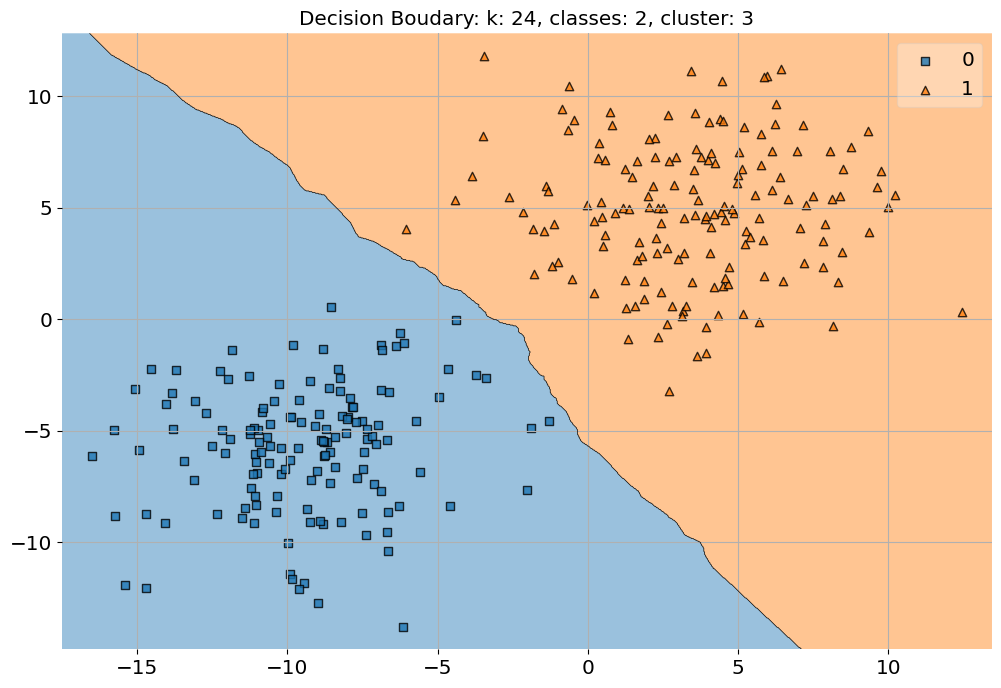

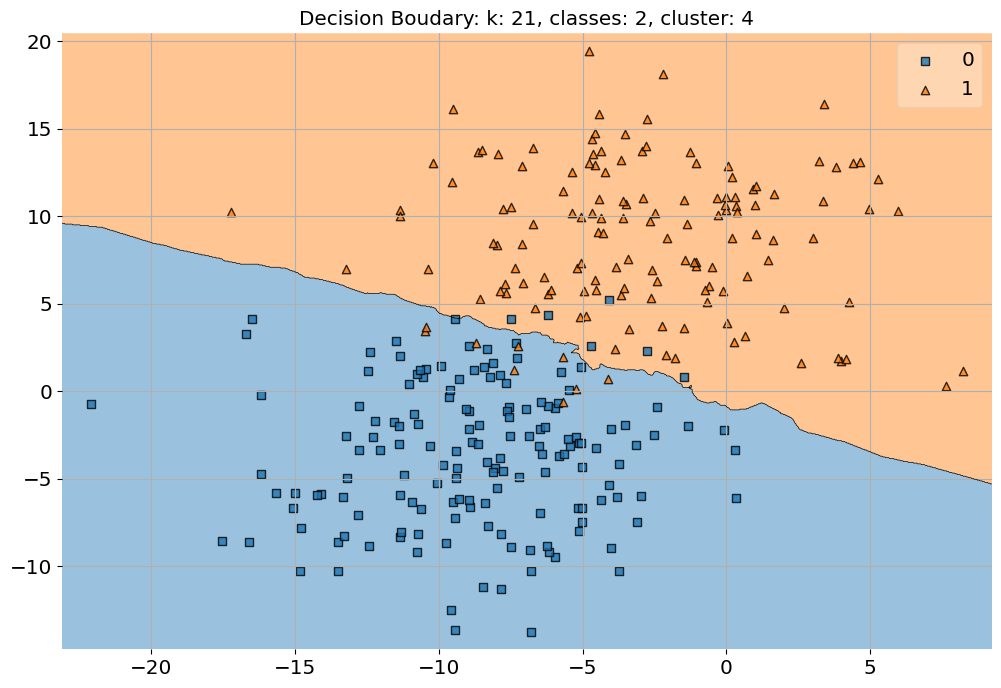

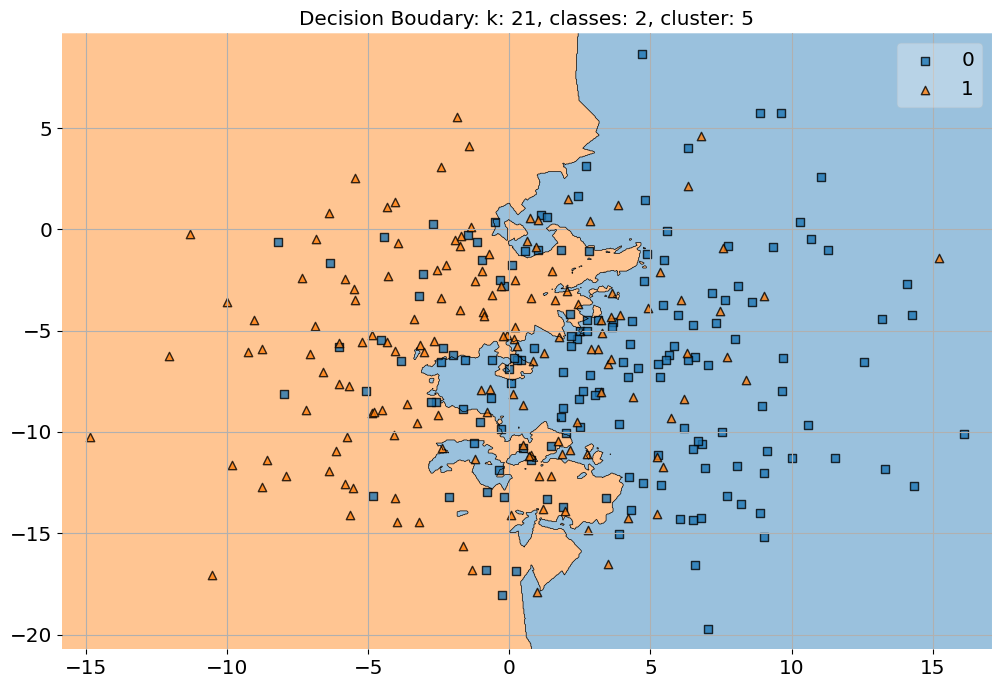

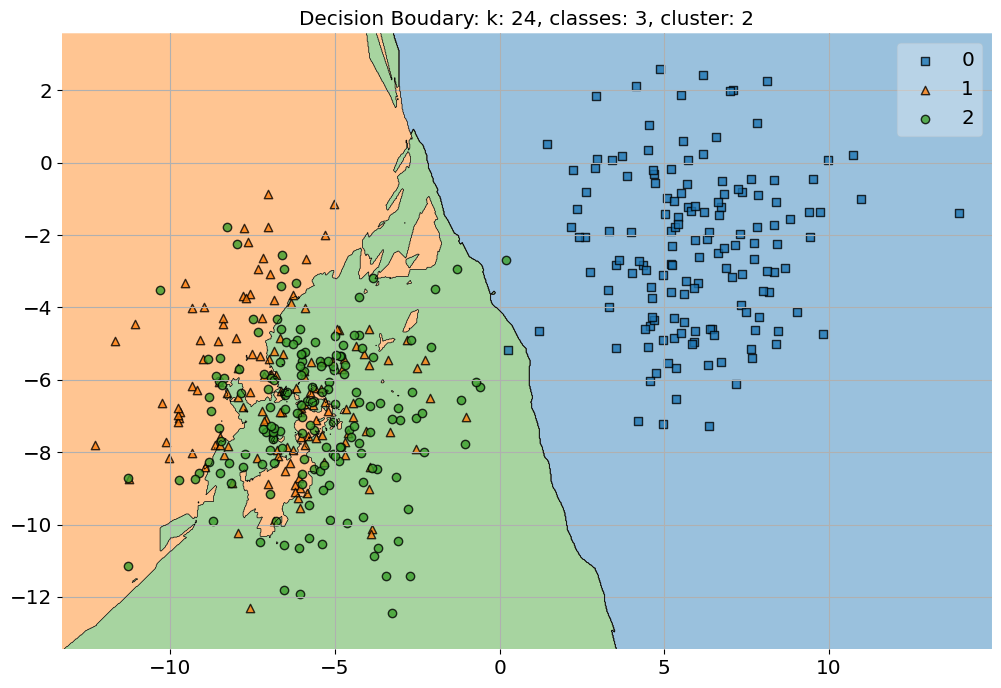

C:\Users\Grimmar\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


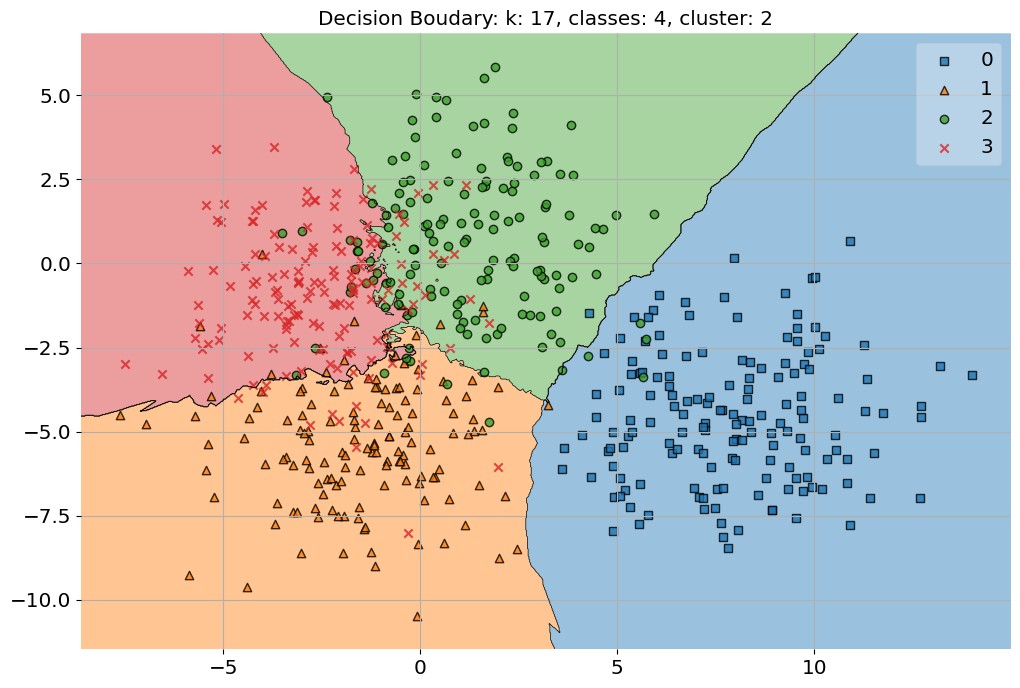

C:\Users\Grimmar\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


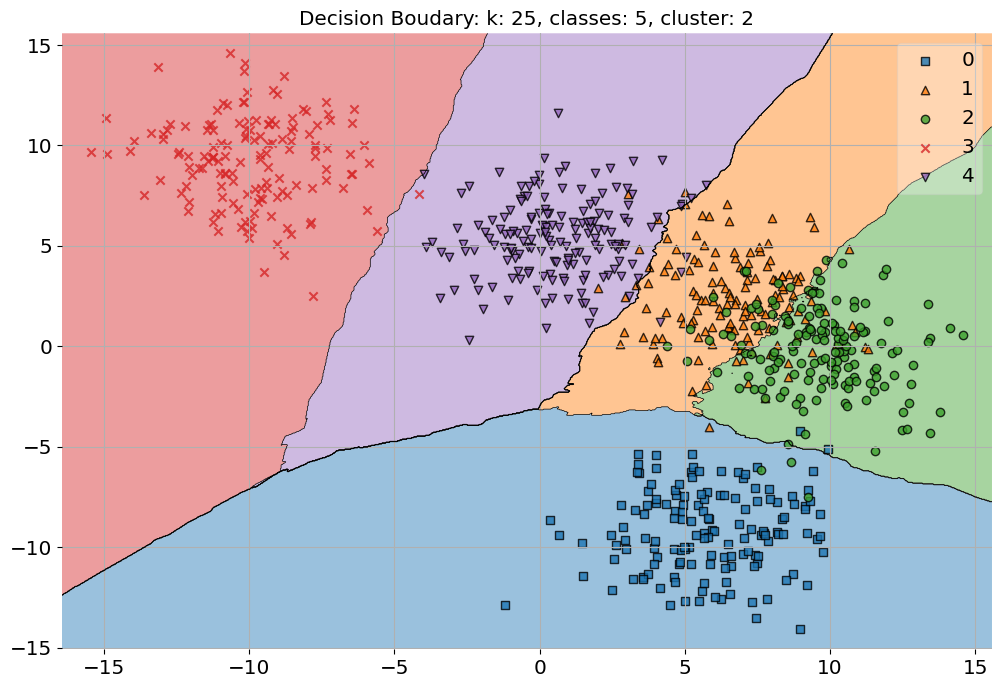

In [90]:
# cluster spread increase
toyDataset(2, 3)
toyDataset(2, 4)
toyDataset(2, 5)

# number of classes increase 
toyDataset(3, 2)
toyDataset(4, 2)
toyDataset(5, 2)

As the cluster spread increase, the distribution becomes more dispersed, i.e. there are more areas of overlap, making it more difficult to create boundaries that can distinguish between the two categories. We can also find that k has a trend of decrease.
As the classes spread increase, if the overlap region between categories becomes larger, the value of k will decrease.

# Part 2: Application

In this portion of the lab, you will work with audio recordings of two music genres: *Kiki* and *Bouba*. These genres are popular amongst the beings that inhabit the digital world. Download the zipfile from the Canvas lab 02 page, unzip, and put them somewhere you can find them. 

Below are two functions we will use to extract features from the audio data.

In [91]:
def extractZC( data, windowsizeinsamples, windowhopinsamples ):
  totalnumberofwindows = np.floor((len(data)-windowsizeinsamples)/windowhopinsamples)
  numbersignchanges = []
  for ii in np.arange(totalnumberofwindows):
    windowstart = np.int(ii*windowhopinsamples)
    windowend = np.int(windowstart + windowhopinsamples)
    datasign = np.sign(data[windowstart:windowend])
    datasignderivative = datasign - np.roll(datasign,1)
    numbersignchanges.append(np.count_nonzero(datasignderivative[1:-1]))
  return np.array(numbersignchanges)

def extractSC( data, windowsizeinsamples, windowhopinsamples, samplerate ):
  totalnumberofwindows = np.floor((len(data)-windowsizeinsamples)/windowhopinsamples)
  centroid = []
  freqs = np.arange(np.ceil(windowsizeinsamples/2.0)+1)*samplerate/windowsizeinsamples
  for ii in np.arange(totalnumberofwindows):
    windowstart = np.int(ii*windowhopinsamples)
    windowend = np.int(windowstart + windowsizeinsamples)
    DATA = np.abs(np.fft.fft(data[windowstart:windowend]))
    centroid.append(np.sum(freqs*DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)])/
                    np.sum(DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)]))
  return np.array(centroid)

# 2.1 

Using the functions above, compute zero crossing and spectral centroid features for all kiki and bouba training data files using contiguous 100 ms frames. (Ignore any frames at the end of audio files that are less than that length.) Create a two-dimensional scatter plot of the features extracted from the training data. Below is what my scatter plot looks like, just so you know.

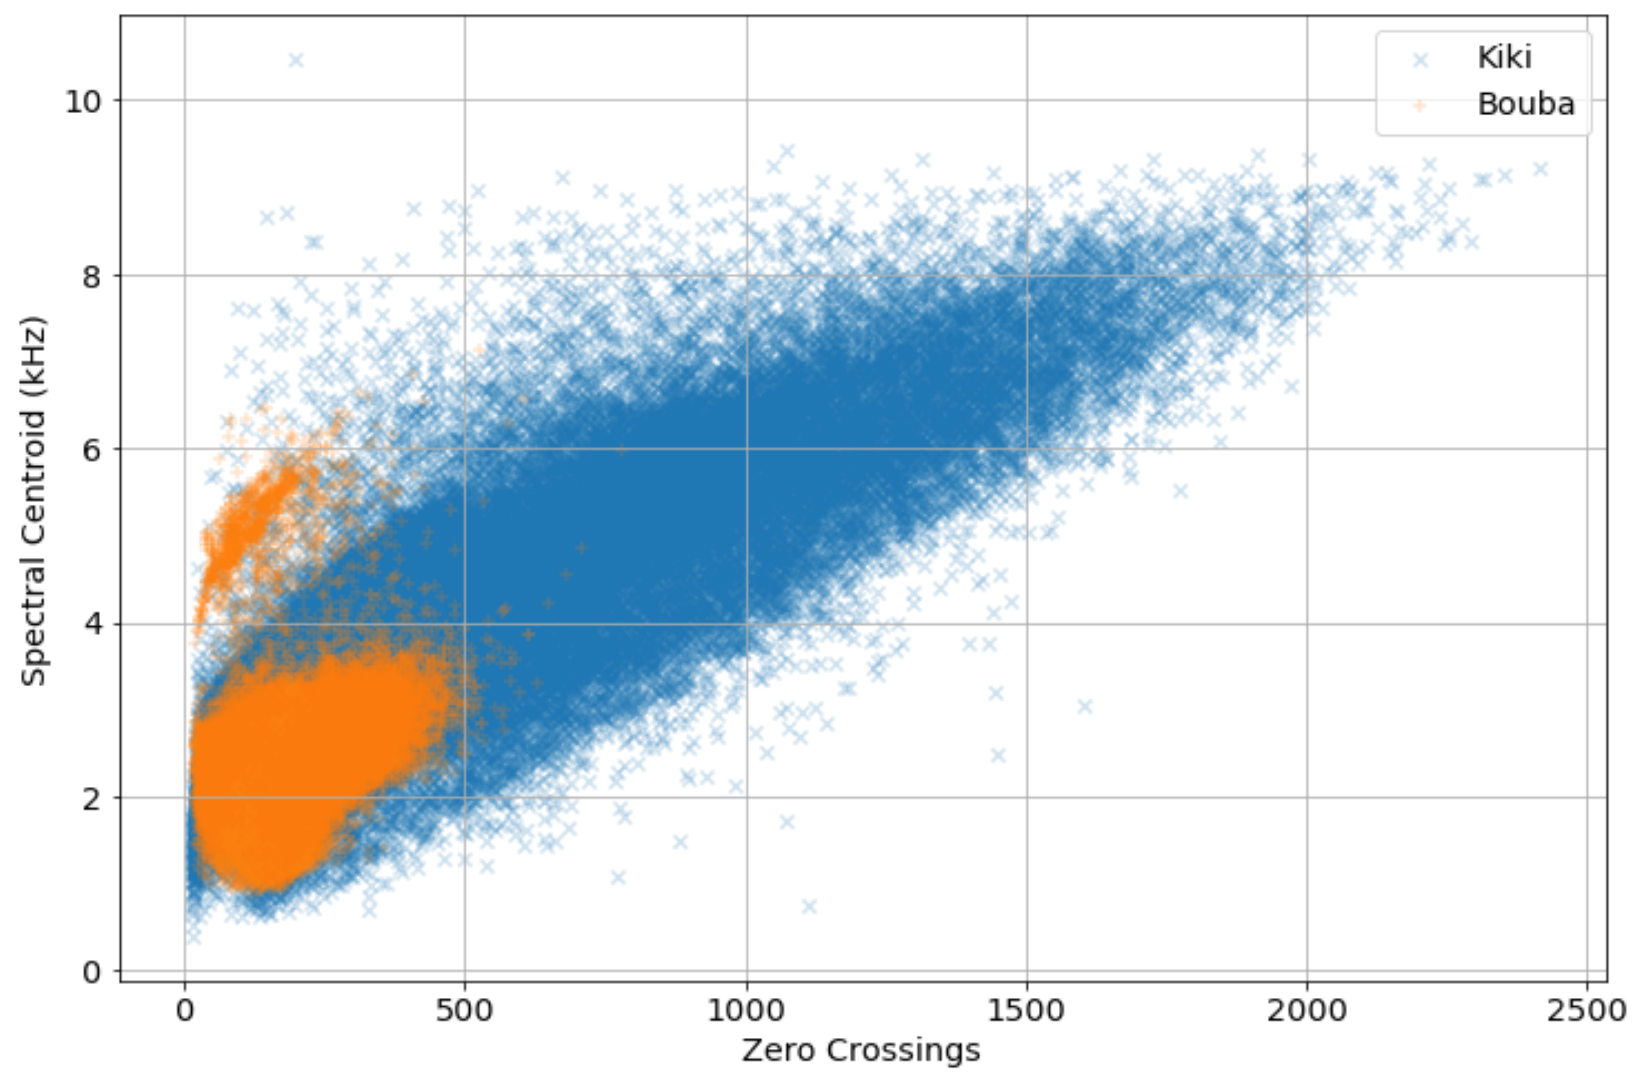

In [92]:
import numpy as np
from pydub import AudioSegment
import os

def extractZCandSC(path):
    zc = []
    sc = []
    audio_list = [x for x in os.listdir(path) if x.endswith(".m4a")]
    for file in audio_list:
        audio = AudioSegment.from_file(path + file, format="m4a")
        Fs = audio.frame_rate
        audio_array = np.array(audio.get_array_of_samples())
        
        frame_size = int(100 * Fs / 1000)
        hop_size = frame_size
        
        zc.append(extractZC(audio_array, frame_size, hop_size))
        sc.append(extractSC(audio_array, frame_size, hop_size, Fs)) 
        
    return audio_list, zc, sc


C:\Users\Grimmar\AppData\Local\Temp\ipykernel_25412\1061470655.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  windowstart = np.int(ii*windowhopinsamples)
C:\Users\Grimmar\AppData\Local\Temp\ipykernel_25412\1061470655.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

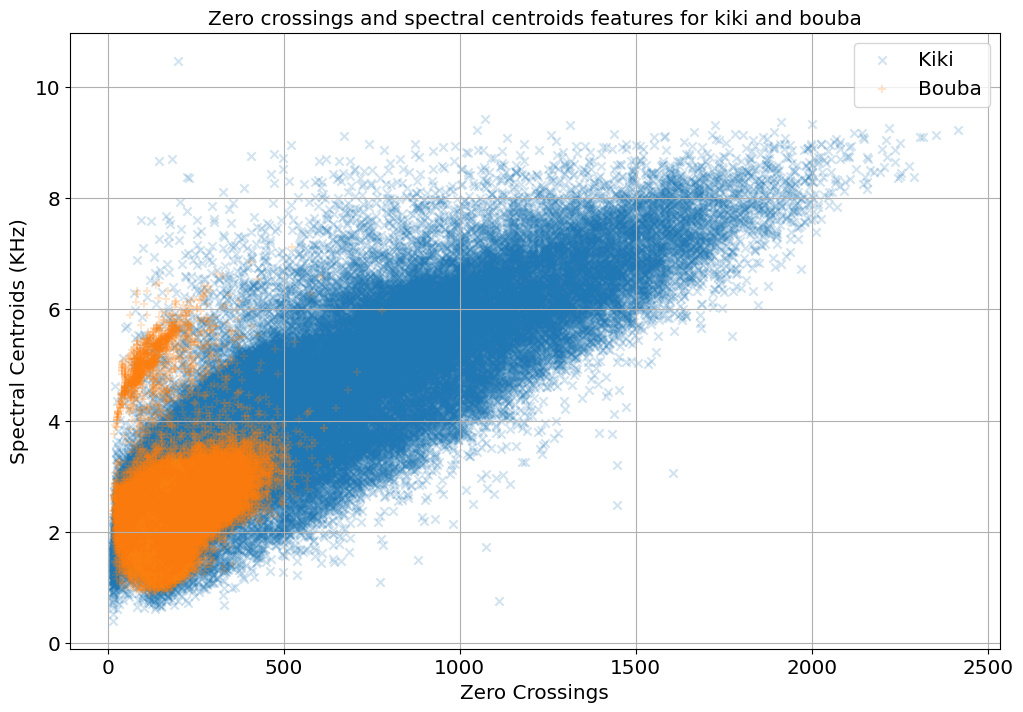

In [93]:
import matplotlib.pyplot as plt
kiki_train, kiki_zc, kiki_sc = extractZCandSC('./KikiBoubadata/kikibouba_train/kiki/')
bouba_train, bouba_zc, bouba_sc = extractZCandSC('./KikiBoubadata/kikibouba_train/bouba/')

kiki_zc = np.concatenate(kiki_zc)
kiki_sc = np.concatenate(kiki_sc)/1000
bouba_zc = np.concatenate(bouba_zc)
bouba_sc = np.concatenate(bouba_sc)/1000

plt.figure()
plt.grid()
plt.title('Zero crossings and spectral centroids features for kiki and bouba')
plt.xlabel('Zero Crossings')
plt.ylabel('Spectral Centroids (KHz)')
plt.scatter(kiki_zc, kiki_sc, label='Kiki', marker='x', alpha=0.2)
plt.scatter(bouba_zc, bouba_sc, label='Bouba', marker='+', alpha=0.2)
plt.legend(loc='upper right')
plt.show()

# 2.2 

Create and plot histograms of the zero crossings feature and the spectral centroid feature for the class kiki. Use 50 bins. Do the same for bouba. Normalize each histogram by setting the parameter "density=True" in either [pandas.DataFrame.hist](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) or [matplotlib.pyplot.hist](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html).

Text(0.5, 1.0, 'Spectral centroids feature for kiki ')

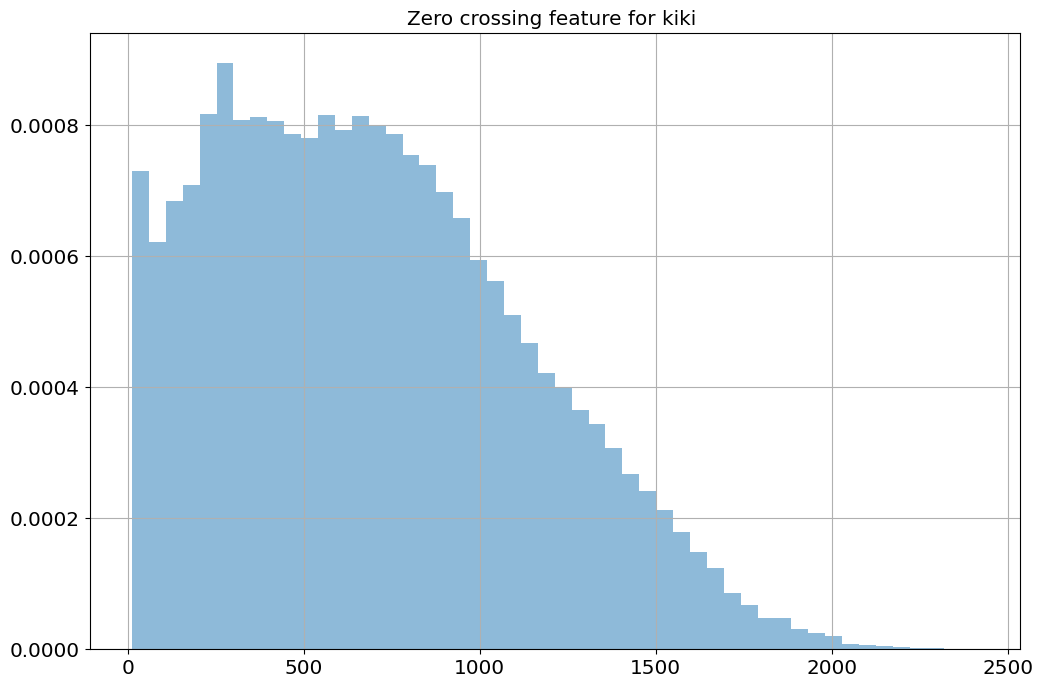

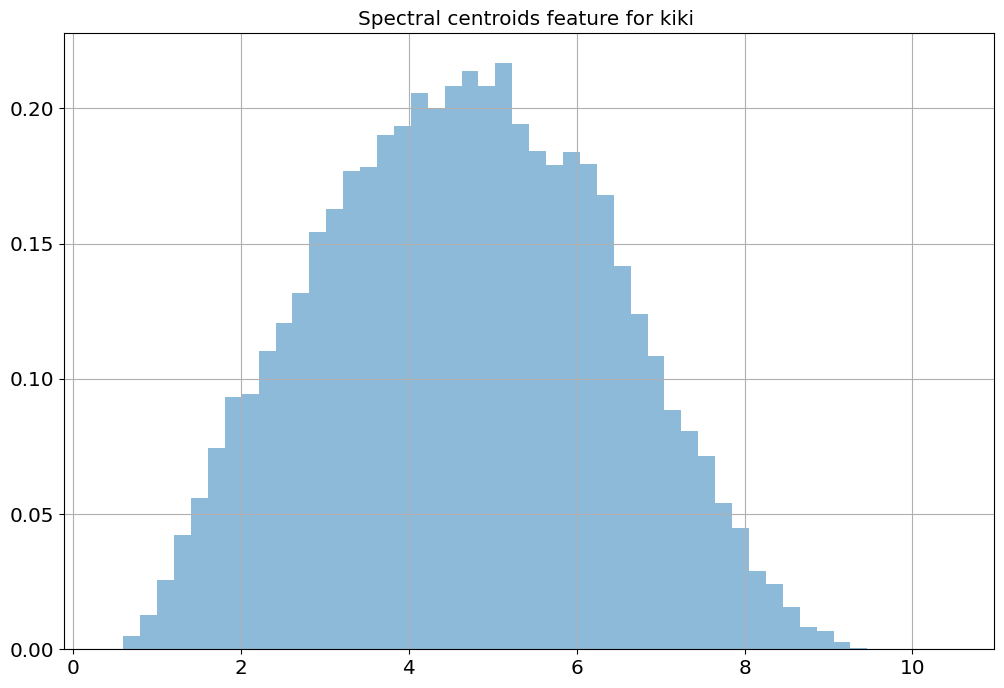

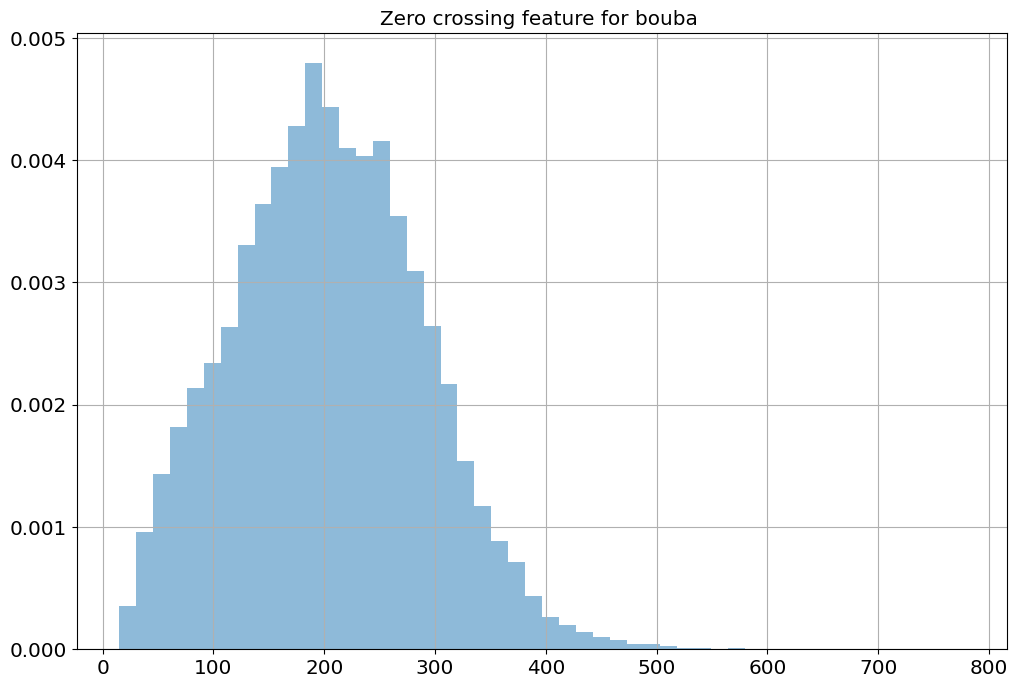

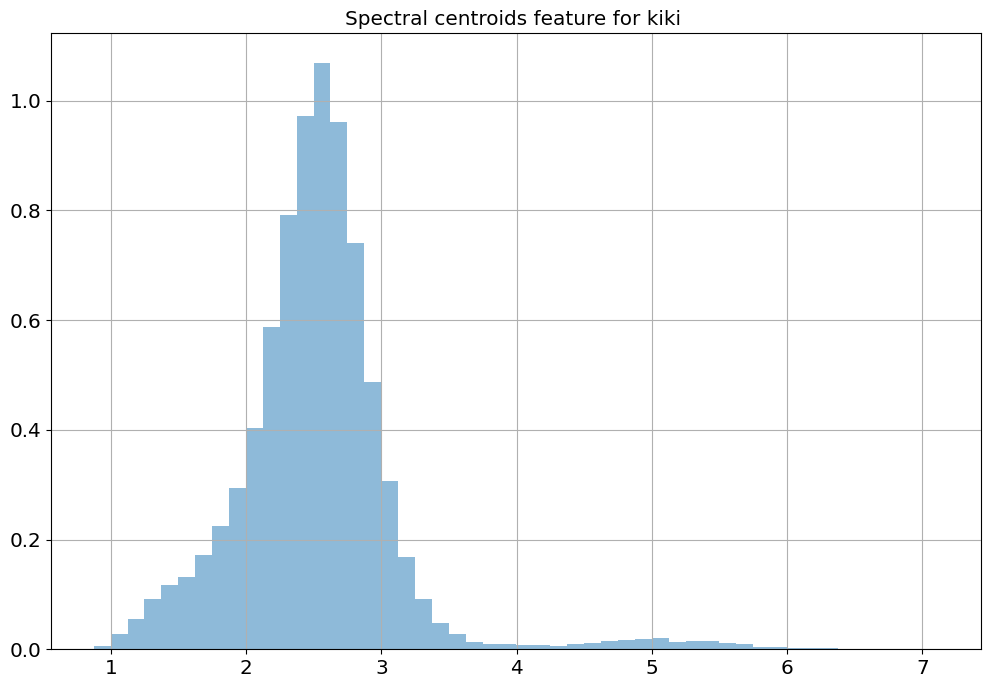

In [103]:
plt.figure(1)
plt.hist(kiki_zc, bins=50, density=True, alpha=0.5)
plt.grid()
plt.title('Zero crossing feature for kiki ')

plt.figure(2)
plt.hist(kiki_sc, bins=50, density=True, alpha=0.5)
plt.grid()
plt.title('Spectral centroids feature for kiki ')

plt.figure(3)
plt.hist(bouba_zc, bins=50, density=True, alpha=0.5)
plt.grid()
plt.title('Zero crossing feature for bouba ')

plt.figure(4)
plt.hist(bouba_sc, bins=50, density=True, alpha=0.5)
plt.grid()
plt.title('Spectral centroids feature for kiki ')



# 2.3 

Let's model *each* feature of the *each* class by a Gausssian distribution.
This means we want to approximate each histogram of each feature observed in class $g$ by a Gaussian function with mean $\mu_{*,g}$ and variance $\sigma_{*,g}^2$:
$$f_{X|G}(x|g) = \frac{1}{\sqrt{2\pi \sigma_{*,g}^2}} \exp\left [-(x-\mu_{*,g})^2/2\sigma_{*,g}^2\right ]$$

Use unbiased maximum likelihood estimation (MLE) to compute the parameters of the two distributions using your training observations. Remember, the MLE mean of $N$ numbers $\{x_1, x_2, \ldots, x_N\}$ is given by $$\hat\mu = \frac{1}{N}\sum_{n=1}^N x_n$$ and the MLE variance is given by $$\sigma^2 = \frac{1}{N-1}\sum_{n=1}^N (x_n-\hat\mu)^2.$$

Plot these four distributions, overlayed on the normalized histograms of the features for the two classes.

Here's what mine look like:
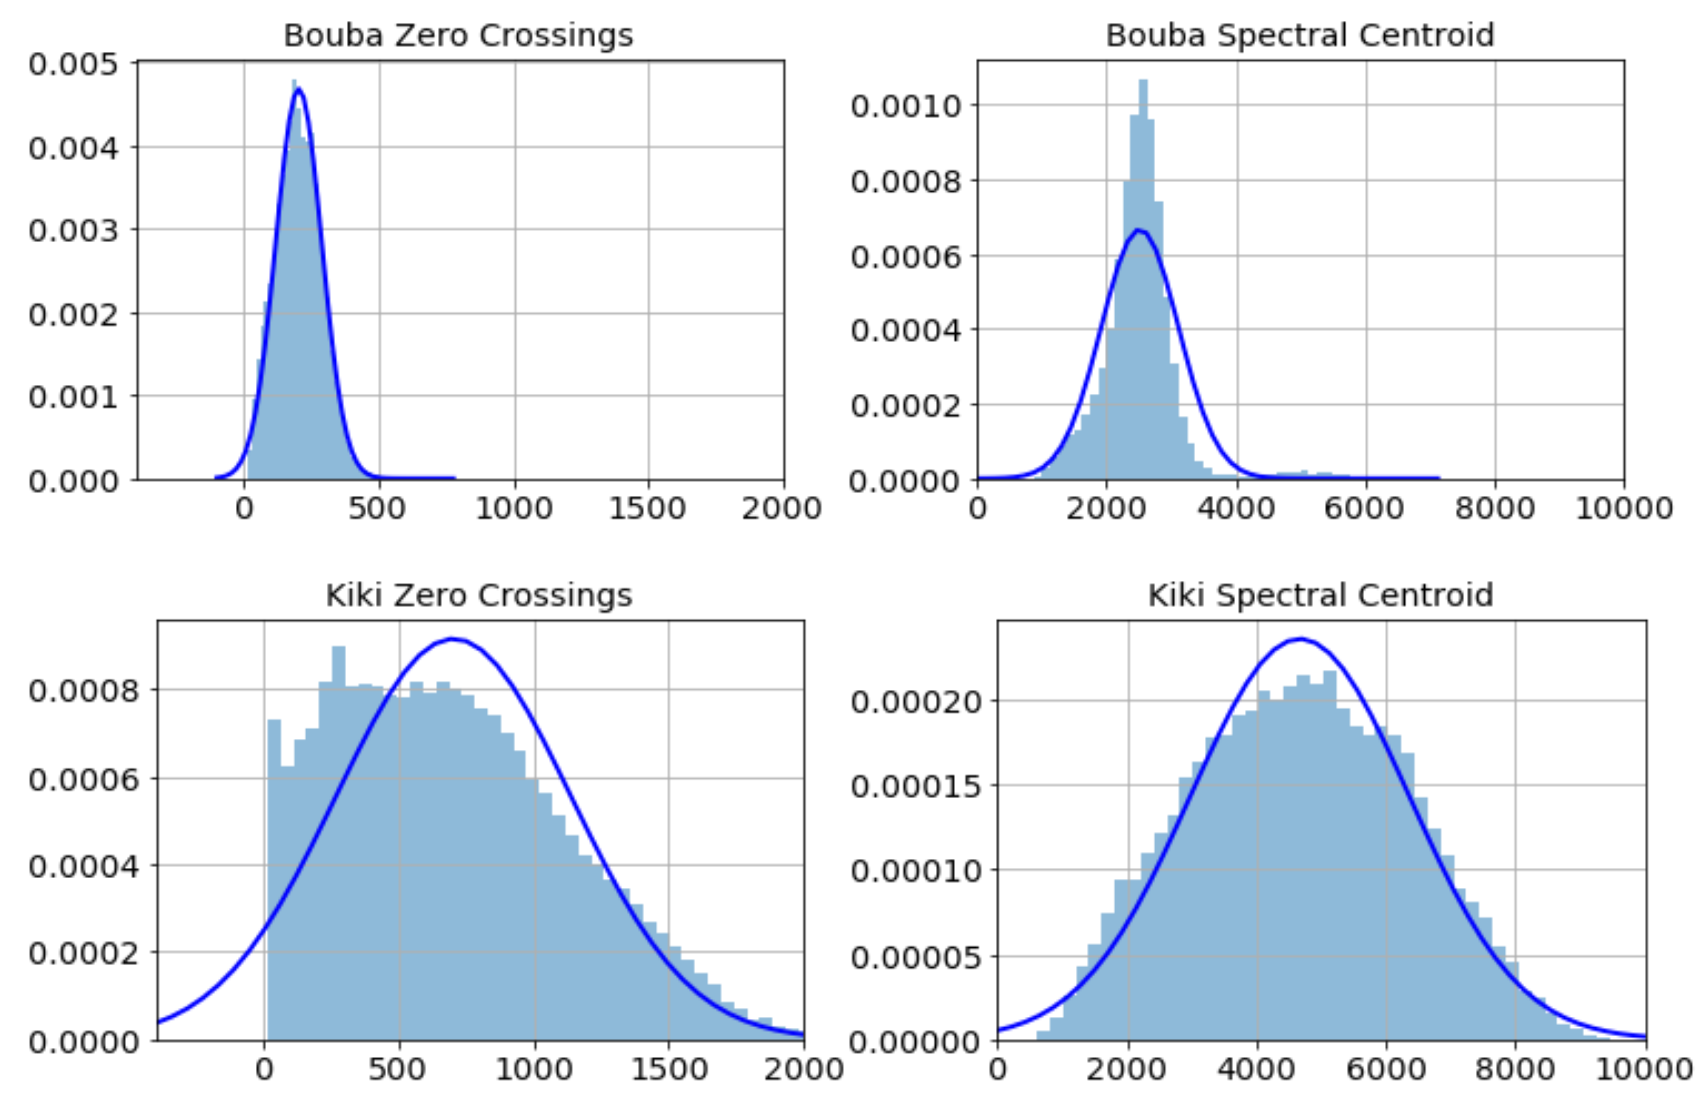

In [112]:
from scipy.stats import norm

def myMLE(data, title):
    x = np.linspace(np.amin(data), np.amax(data), data.shape[0])
    gauss = norm(loc=np.mean(data), scale=np.std(data))
    plt.figure()
    hist = plt.hist(data, bins=50, density=True, alpha=0.5)
    plt.plot(x, gauss.pdf(x), color='blue')
    plt.grid()
    plt.title(title)
    return gauss

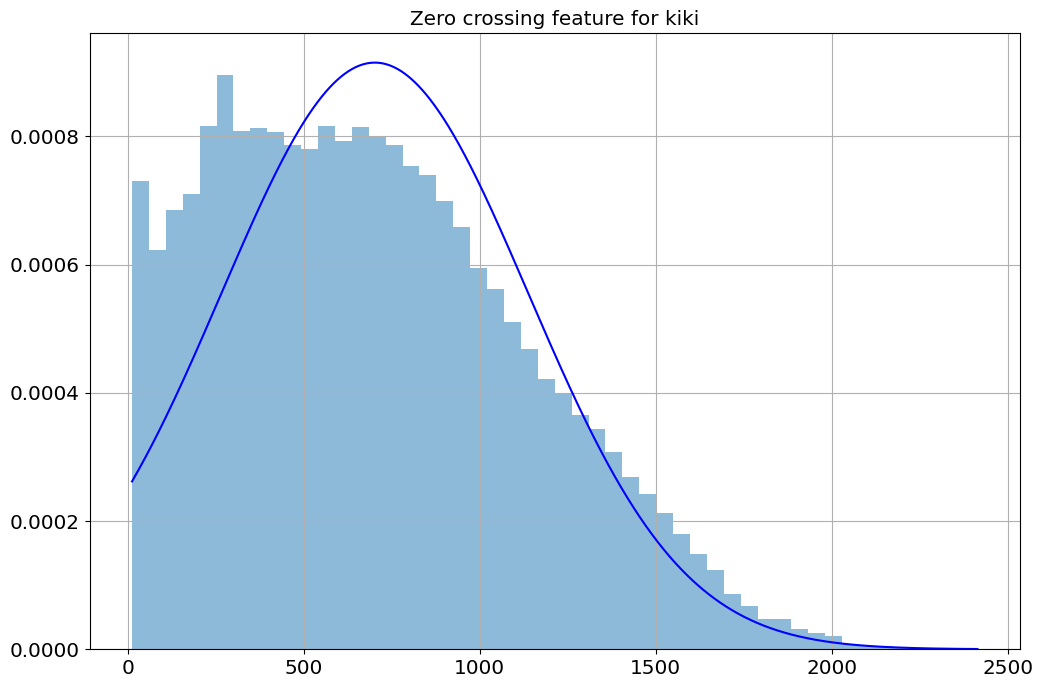

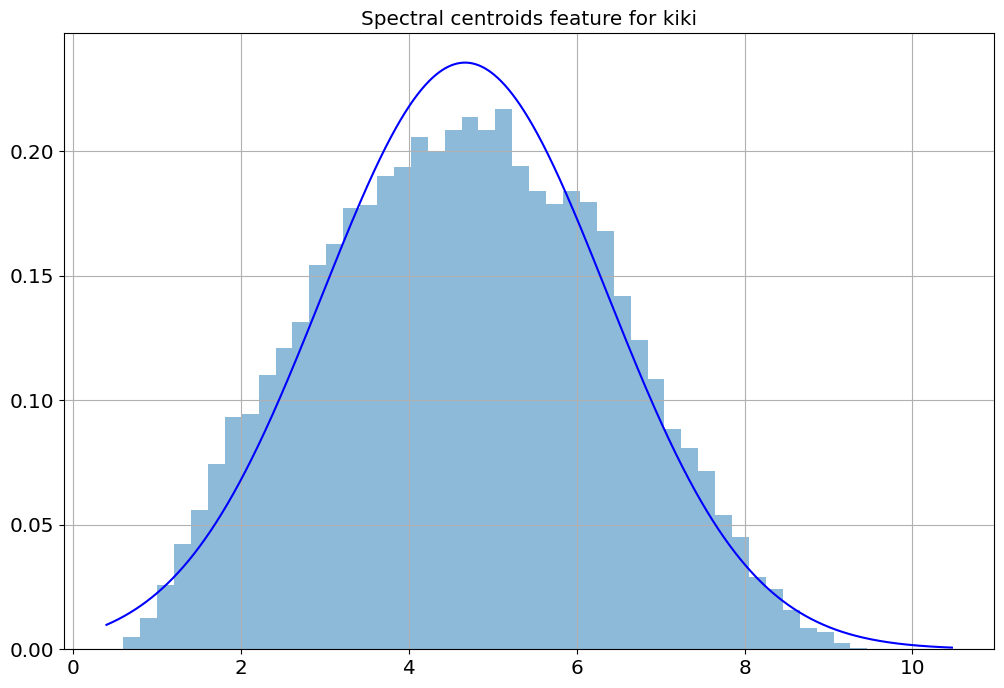

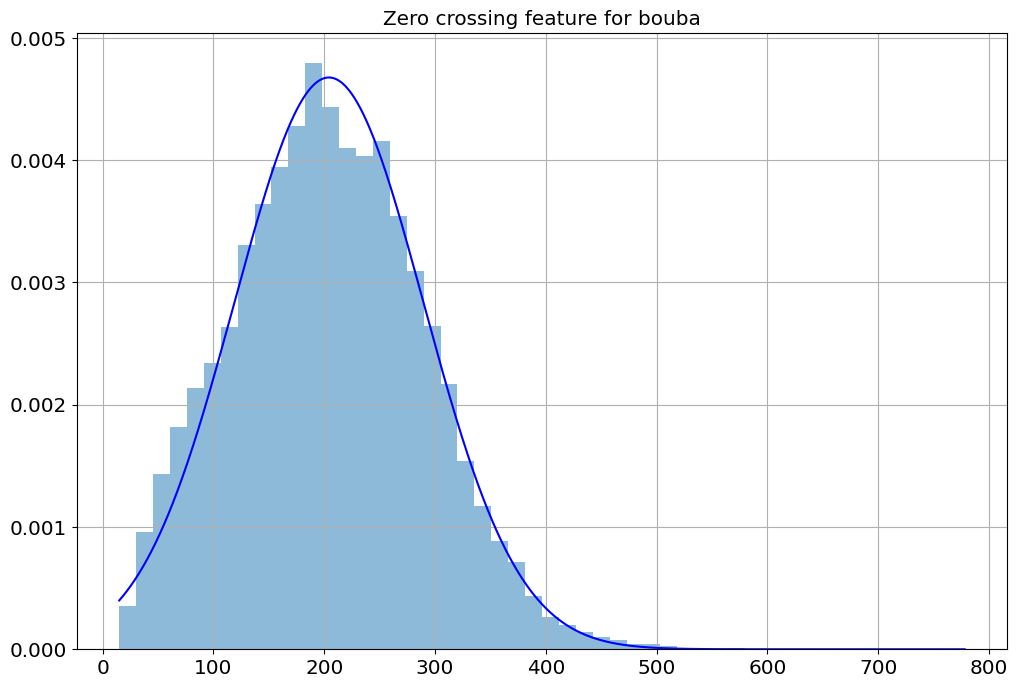

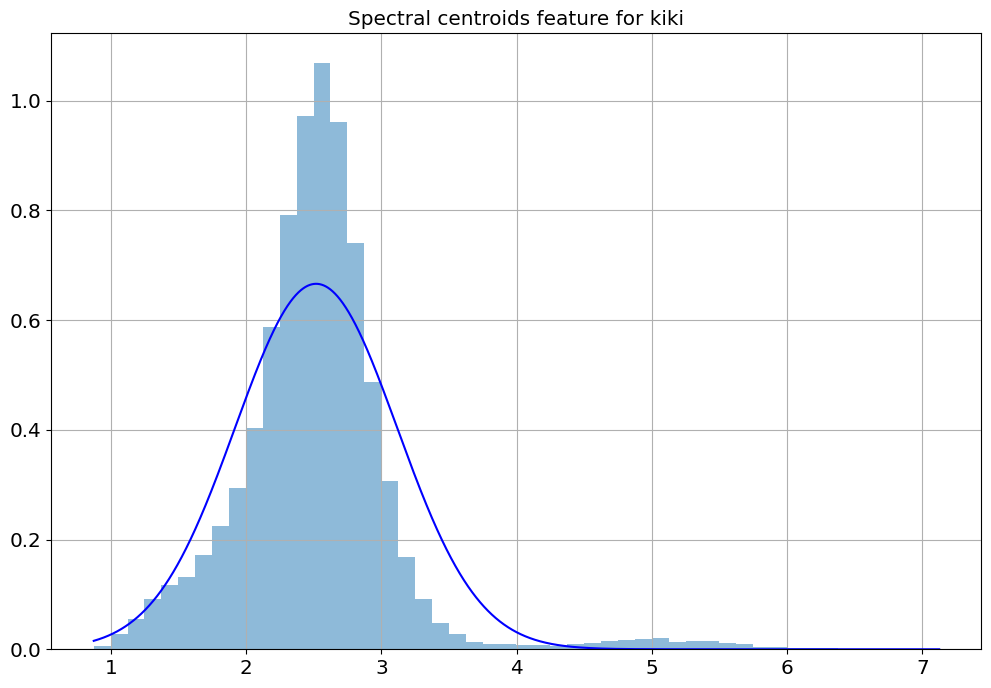

In [113]:
kiki_zc_gauss = myMLE(kiki_zc, 'Zero crossing feature for kiki')
kiki_sc_gauss = myMLE(kiki_sc, 'Spectral centroids feature for kiki')
bouba_zc_gauss = myMLE(bouba_zc, 'Zero crossing feature for bouba')
bouba_sc_gauss = myMLE(bouba_sc, 'Spectral centroids feature for kiki')

# 2.4

Given a particular two-dimensional observation $\mathbf{x}$ extracted from an audio file, we want to estimate the probaility of $\mathbf{x}$ coming from class $g \in \{\textrm{Kiki},\textrm{Bouba}\}$, i.e., the *posterior* $P[g|\mathbf{x}]$.
By Bayes' Theorem, we can express this probability as:

$$P[G=g|\mathbf{x}] = \frac{f_{\mathbf{X}|G}(\mathbf{x}|G=g)P[G=g]}{f_\mathbf{X}(\mathbf{x})}$$

where the *likelihood* $f_{\mathbf{X}|G}(\mathbf{x}|G=g)$ is the probability density of observing $\mathbf{x}$ from class $g$, $P[G=g]$ is the *prior* probability of encountering $g$ regardless of what we observe, and $f_\mathbf{X}(\mathbf{x})$ is the probability density of observing $\mathbf{x}$ no matter what class.

We define the *posterior odds* of Kiki as the ratio:
$$O(G=\textrm{Kiki}|\mathbf{x}) = \frac{P[G=\textrm{Kiki}|\mathbf{x}]}{P[G=\textrm{Bouba}|\mathbf{x}]}$$
Similarly, the posterior odds of Bouba is the ratio 
$$O(G=\textrm{Bouba}|\mathbf{x}) = \frac{P[G=\textrm{Bouba}|\mathbf{x}]}{P[G=\textrm{Kiki}|\mathbf{x}]} =\frac{1}{O(G=\textrm{Kiki}|\mathbf{x})}.$$

These are easy to understand. For instance, if $O(G=\textrm{Kiki}|\mathbf{x}) = 2$, then according to our model Kiki is twice as likely given $\mathbf{x}$ than Bouba, or Bouba is half as likely as Kiki. By plugging in the equation for $P[G=g|\mathbf{x}]$, the odds of Kiki can be expressed

$$O(G=\textrm{Kiki}|\mathbf{x}) = \frac{f_{\mathbf{X}|G}(\mathbf{x}|G=\textrm{Kiki})}{f_{\mathbf{X}|G}(\mathbf{x}|G=\textrm{Bouba})}\frac{P[G=\textrm{Kiki}]}{P[G=\textrm{Bouba}]}$$

So the posterior odds of Kiki is just the product of the ratio of posterior probability densities and prior probabilities.

If for an observation $O(G=\textrm{Kiki}|\mathbf{x}) > 2$, then we might label it as Kiki. Otherwise we could label it Bouba.
We just need to compute the densities $f_{\mathbf{X}|G}(\mathbf{x}|G=g)$.

This is where our Gaussian models come into play.
We know the first element of $\mathbf{x}$ is the zero crossing feature, and the second element is spectral centroid. If we assume these two features are independent, then:

$$f_{\mathbf{X}|G}(x_z,x_s|G=g) = f_{X_z|G}(x_z|G=g)f_{X_s|G}(x_s|G=g)$$

where $x_z$ is the zero crossing feature, and $x_s$ is the spectral centroid features.
If we assume each feature is distributed Gaussian, then

$$f_{X_*|G}(x_*|G=g) = \frac{1}{\sqrt{2\pi \sigma_{*,g}^2}} \exp\left [-(x_*-\mu_{*,g})^2/2\sigma_{*,g}^2\right ].$$

Given our estimates of these four parameters $\{\mu_{z,g},\sigma_{z,g}^2,\mu_{s,g},\sigma_{s,g}^2\}$ for Kiki and for Bouba, we are *almost* ready to build a classification system.

We need to estimate the prior probabilities, $P[G=\textrm{Kiki}]$ and $P[G=\textrm{Bouba}]$.

To do that, assume the training data reflects how observations are distributed in the real world, and estimate $P[G=\textrm{Kiki}]$ as the proportion of observations of Kiki in the training dataset, and $P[G=\textrm{Bouba}]$ as the proportion of observations of Bouba in the training dataset.

In [106]:
kiki_prior = len(kiki_train)/ (len(kiki_train) + len(bouba_train))
bouba_prior = len(bouba_train)/ (len(kiki_train) + len(bouba_train))

# 2.5

Now write a function using all the parameters you have estimated that computes the posterior odds of Kiki given a two-dimensional observation, and returns 1 (Kiki) if the odds are greater than 2, and otherwise 0 (Bouba). Use the MLE parameters you found in the previous part.

In [107]:
def mygaussian(x, mu, sigma):
    gauss = 1 / np.sqrt(2 * np.pi * np.power(sigma, 2)) * np.exp(-(np.power((x - mu), 2)) / (2 * np.power(sigma, 2)))
    return gauss

def posteriorodds(zc,sc):
    prior_ratio = kiki_prior / bouba_prior
    kiki_gauss = mygaussian(zc, kiki_zc_gauss.mean(), kiki_zc_gauss.std()) * mygaussian(sc, kiki_sc_gauss.mean(), kiki_sc_gauss.std()) 
    bouba_gauss = mygaussian(zc, bouba_zc_gauss.mean(), bouba_zc_gauss.std()) * mygaussian(sc, bouba_sc_gauss.mean(), bouba_sc_gauss.std())
    post_odds = kiki_gauss / bouba_gauss * prior_ratio
    if post_odds > 2:
        return 1
    else:
        return 0

In [108]:
import random
idx =  random.randint(0, len(kiki_zc) - 1)
pred_class = posteriorodds(kiki_zc[idx], kiki_sc[idx])
print('Predicted class for observation: ', pred_class)

Predicted class for observation:  0


# 2.6 

Use your function to label all observations in the training data and create one scatter plot of the labeled Kiki observations, and one scatter plot of the labeled Bouba observations, both color-coded by the predicted labels. (This should take some time to compute because the classifier you have created is not very optimized.)

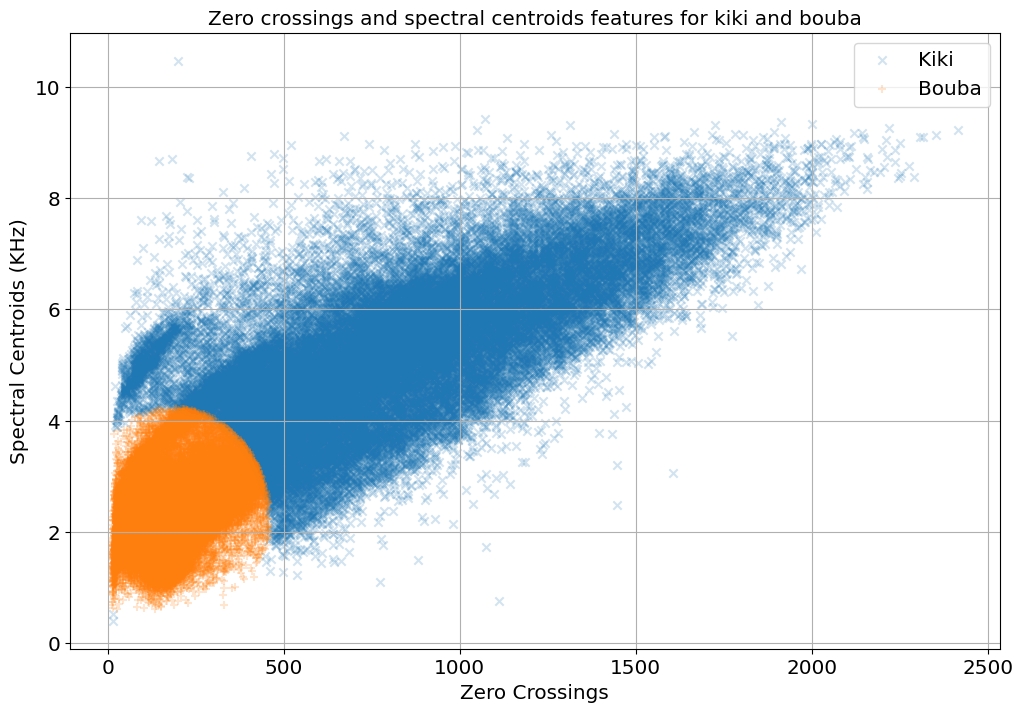

In [109]:
kiki_labels = np.ones(kiki_zc.shape[0])
bouba_labels = np.zeros(bouba_zc.shape[0])
train_labels = np.concatenate((bouba_labels, kiki_labels))

train_zc = np.concatenate((bouba_zc, kiki_zc)).reshape(-1,1)
train_sc = np.concatenate((bouba_sc, kiki_sc)).reshape(-1,1)
train_obs = np.concatenate((train_zc, train_sc), axis=1)

pred_labels = np.empty(train_labels.shape, dtype=int)
for idx, obs in enumerate(train_obs):
    pred_labels[idx] = posteriorodds(obs[0], obs[1])

bouba_idx = np.where(pred_labels == 0)
kiki_idx = np.where(pred_labels == 1)
bouba_pred = train_obs[bouba_idx[0]]
kiki_pred = train_obs[kiki_idx[0]]

plt.figure()
plt.grid()
plt.title('Zero crossings and spectral centroids features for kiki and bouba')
plt.xlabel('Zero Crossings')
plt.ylabel('Spectral Centroids (KHz)')
plt.scatter(kiki_pred[:, 0], kiki_pred[:, 1], label='Kiki', marker='x', alpha=0.2)
plt.scatter(bouba_pred[:, 0], bouba_pred[:, 1], label='Bouba', marker='+', alpha=0.2)
plt.legend(loc='upper right')
plt.show()

# 2.7

Explain what you see, and how it compares to the scatter plot you created in #2.1.

Compared to the figure in #2.1, the Bouba between 4 to 6 KHz spectral centroids above the main Bouba cluster, are completely lost. Points scattered outside the main Bouba cluster are also identified as Kiki. Similarly, the Kiki below the main Bouba cluster are almost identified as Bouba. The boundary between Bouba and Kiki is too clearly delineated, which is due to the classifier not being able to distinguish well between the points where the ZC and SC features are similar in both.

# 2.8 
Compute a confusion table summarizing the results of your classifier on the training dataset. Compute the accuracy and balanced accuracy. Compute the precision and recall for both classes.

In [110]:
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score
conf_mat = confusion_matrix(train_labels, pred_labels)
print('Confusion matrix\n', conf_mat)
cr = classification_report(train_labels, pred_labels)
print('\nClassification report \n', cr)
bas = balanced_accuracy_score(train_labels, pred_labels)
print('\nBalanced Accuracy \n', bas)

Confusion matrix
 [[51730  1655]
 [11362 34648]]

Classification report 
               precision    recall  f1-score   support

         0.0       0.82      0.97      0.89     53385
         1.0       0.95      0.75      0.84     46010

    accuracy                           0.87     99395
   macro avg       0.89      0.86      0.87     99395
weighted avg       0.88      0.87      0.87     99395


Balanced Accuracy 
 0.8610262332056322


# 2.9 

Use your function to label all observations in the testing dataset. Compute a confusion table summarizing the results of your classifier on the testing dataset. Compute the accuracy and balanced accuracy. Compute the precision and recall for both classes. Compare with the results on the training dataset.

In [111]:
kiki_test, kiki_zc_test, kiki_sc_test = extractZCandSC('./KikiBoubadata/kikibouba_test/kiki/')
bouba_test, bouba_zc_test, bouba_sc_test = extractZCandSC('./KikiBoubadata/kikibouba_test/bouba/')

kiki_zc_test = np.concatenate(kiki_zc_test)
kiki_sc_test = np.concatenate(kiki_sc_test)/1000
bouba_zc_test = np.concatenate(bouba_zc_test)
bouba_sc_test = np.concatenate(bouba_sc_test)/1000

kiki_labels_test = np.ones(kiki_zc_test.shape[0])
bouba_labels_test = np.zeros(bouba_zc_test.shape[0])
test_labels = np.concatenate((bouba_labels_test, kiki_labels_test))

test_zc = np.concatenate((bouba_zc_test, kiki_zc_test)).reshape(-1,1)
test_sc = np.concatenate((bouba_sc_test, kiki_sc_test)).reshape(-1,1)
test_obs = np.concatenate((test_zc, test_sc), axis=1)

pred_labels_test = np.empty(test_labels.shape, dtype=int)
for idx, obs in enumerate(test_obs):
    pred_labels_test[idx] = posteriorodds(obs[0], obs[1])

conf_mat = confusion_matrix(train_labels, pred_labels)
print('Confusion matrix\n', conf_mat)
cr = classification_report(train_labels, pred_labels)
print('\nClassification report \n', cr)
bas = balanced_accuracy_score(train_labels, pred_labels)
print('\nBalanced Accuracy \n', bas)

C:\Users\Grimmar\AppData\Local\Temp\ipykernel_25412\1061470655.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  windowstart = np.int(ii*windowhopinsamples)
C:\Users\Grimmar\AppData\Local\Temp\ipykernel_25412\1061470655.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

Confusion matrix
 [[51730  1655]
 [11362 34648]]

Classification report 
               precision    recall  f1-score   support

         0.0       0.82      0.97      0.89     53385
         1.0       0.95      0.75      0.84     46010

    accuracy                           0.87     99395
   macro avg       0.89      0.86      0.87     99395
weighted avg       0.88      0.87      0.87     99395


Balanced Accuracy 
 0.8610262332056322


The results of the test dataset is very similar with that of the train dataset. The balanced accuray only reduces by 0.016. This shows that the model has good generalization.

# 2.10

Discuss several ways you might build a better Kiki-Bouba classifier.

First, since in this lab, we model each feature of the each class by a Gausssian distribution, but we don't know the true distribution of this case. The distribution of data can be viewed as other more complex distributions, such as Gaussian Mixed Model. We can also find some ways to approximate the true distribution，like Variational Inference, which is a deterministic approximation method that is useful for large-scale data. 
Second, we can adopt more kinds of features besides zero crossings and sepctral centroids. 
In addition, we can choose another category of classifier, like K-nearest neighbor. 